<a href="https://colab.research.google.com/github/zayo1511/LaboratorioDeAnalisisDeDatosFinancierosYDeDisenoDeIndicadores/blob/main/clase11_prediccion_series_tiempo_entorno_empresarial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de Series Temporales con Auto-TS: Una Aplicación Práctica

## Introducción

En esta sesión, aprenderemos a utilizar la librería `auto-ts` de Python para realizar análisis de series temporales de manera automatizada. A través de un caso práctico dentro de una empresa, comprenderemos cómo aplicar `auto-ts` para predecir ventas futuras y tomar decisiones estratégicas basadas en datos.

## Objetivos de Aprendizaje

- Comprender los conceptos básicos del análisis de series temporales.
- Aprender a utilizar la librería `auto-ts` para modelado automatizado de series temporales.
- Aplicar técnicas de predicción para resolver un problema empresarial real.
- Interpretar los resultados y extraer insights accionables.

---

## Caso Práctico: ForecastTech Inc.

### Contexto de la Empresa

ForecastTech Inc. es una empresa dedicada a la fabricación y venta de dispositivos electrónicos. A lo largo de los últimos tres años, ha experimentado fluctuaciones en sus ventas mensuales debido a factores estacionales y tendencias del mercado.

### Problema Empresarial

El departamento de finanzas necesita prever las ventas mensuales para el próximo año con el fin de:

- Optimizar la gestión del inventario.
- Planificar estrategias de marketing.
- Ajustar la producción y recursos.

### Objetivo de la Sesión

Utilizar `auto-ts` para crear un modelo que prediga las ventas mensuales de ForecastTech Inc. para el próximo año, y proporcionar recomendaciones basadas en el análisis.

---

## Configuración del Entorno

Antes de comenzar, asegúrate de tener instaladas las siguientes librerías:

```bash
pip install auto-ts
pip install pandas
pip install matplotlib


In [1]:
pip install auto-ts -q --disable-pip-version-check > /dev/null 2>&1

In [2]:
pip install prophet -q --disable-pip-version-check > /dev/null 2>&1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from auto_ts import auto_timeseries
from prophet import Prophet
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import drive
drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/Colab Notebooks/Laboratorio de analisis de datos financieros y de diseño de indicadores/Analisis estadistico avanzado para KPIs/'

Imported auto_timeseries version:0.0.92. Call by using:
model = auto_timeseries(score_type='rmse',
        time_interval='M', non_seasonal_pdq=None, seasonality=False,
        seasonal_period=12, model_type=['best'], verbose=2, dask_xgboost_flag=0)
model.fit(traindata, ts_column,target)
model.predict(testdata, model='best')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Paso 1: Importación de Librerías y Carga de Datos
Comenzamos importando las librerías necesarias y cargando el conjunto de datos proporcionado por la empresa.

In [4]:
df = pd.read_csv(data_path + 'ventas_mensuales.csv', parse_dates=['Fecha'])
df.set_index('Fecha', inplace=True)
df.head()

,Ventas
Fecha,
2019-01-31,249.84
2019-02-28,243.17
2019-03-31,295.94
2019-04-30,339.79
2019-05-31,240.41


## Paso 2: Exploración y Visualización de los Datos
Antes de modelar, es importante entender la naturaleza de nuestros datos.

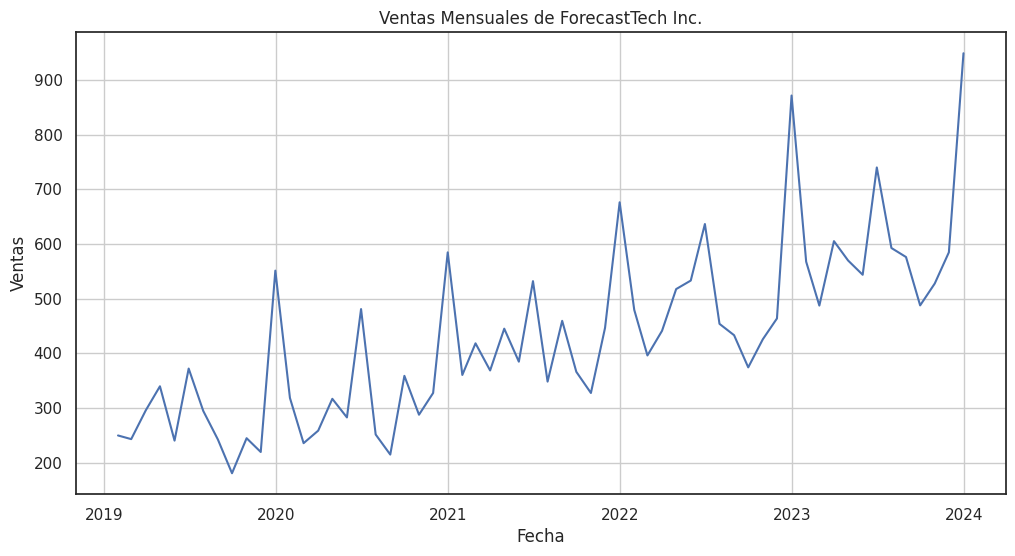

In [5]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ventas'])
plt.title('Ventas Mensuales de ForecastTech Inc.')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

## Paso 3: Configuración del Modelo con Auto-TS
La librería auto_timeseries nos permite automatizar el proceso de selección y ajuste del modelo.

###**ML**

In [6]:
model = auto_timeseries(
    score_type='rmse',       # Métrica de evaluación
    time_interval='M',       # Intervalo mensual
    non_seasonal_pdq=None,   # Para modelos SARIMAX
    seasonality=True,       # Deshabilitar búsqueda de estacionalidad (se puede cambiar)
    model_type='best',       # Seleccionar el mejor modelo
    verbose=2,               # Nivel de verbosidad
    random_state=42
)

Start of Fit.....
    Target variable given as = Ventas
Start of loading of data.....
    Inputs: ts_column = Fecha, sep = ,, target = ['Ventas']
    Using given input: pandas dataframe...
    train time series Fecha column is the index on test data...
    train data shape = (48, 1)
Alert: Could not detect strf_time_format of Fecha. Provide strf_time format during "setup" for better results.
setting maxlag to a low number = 5

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 5 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


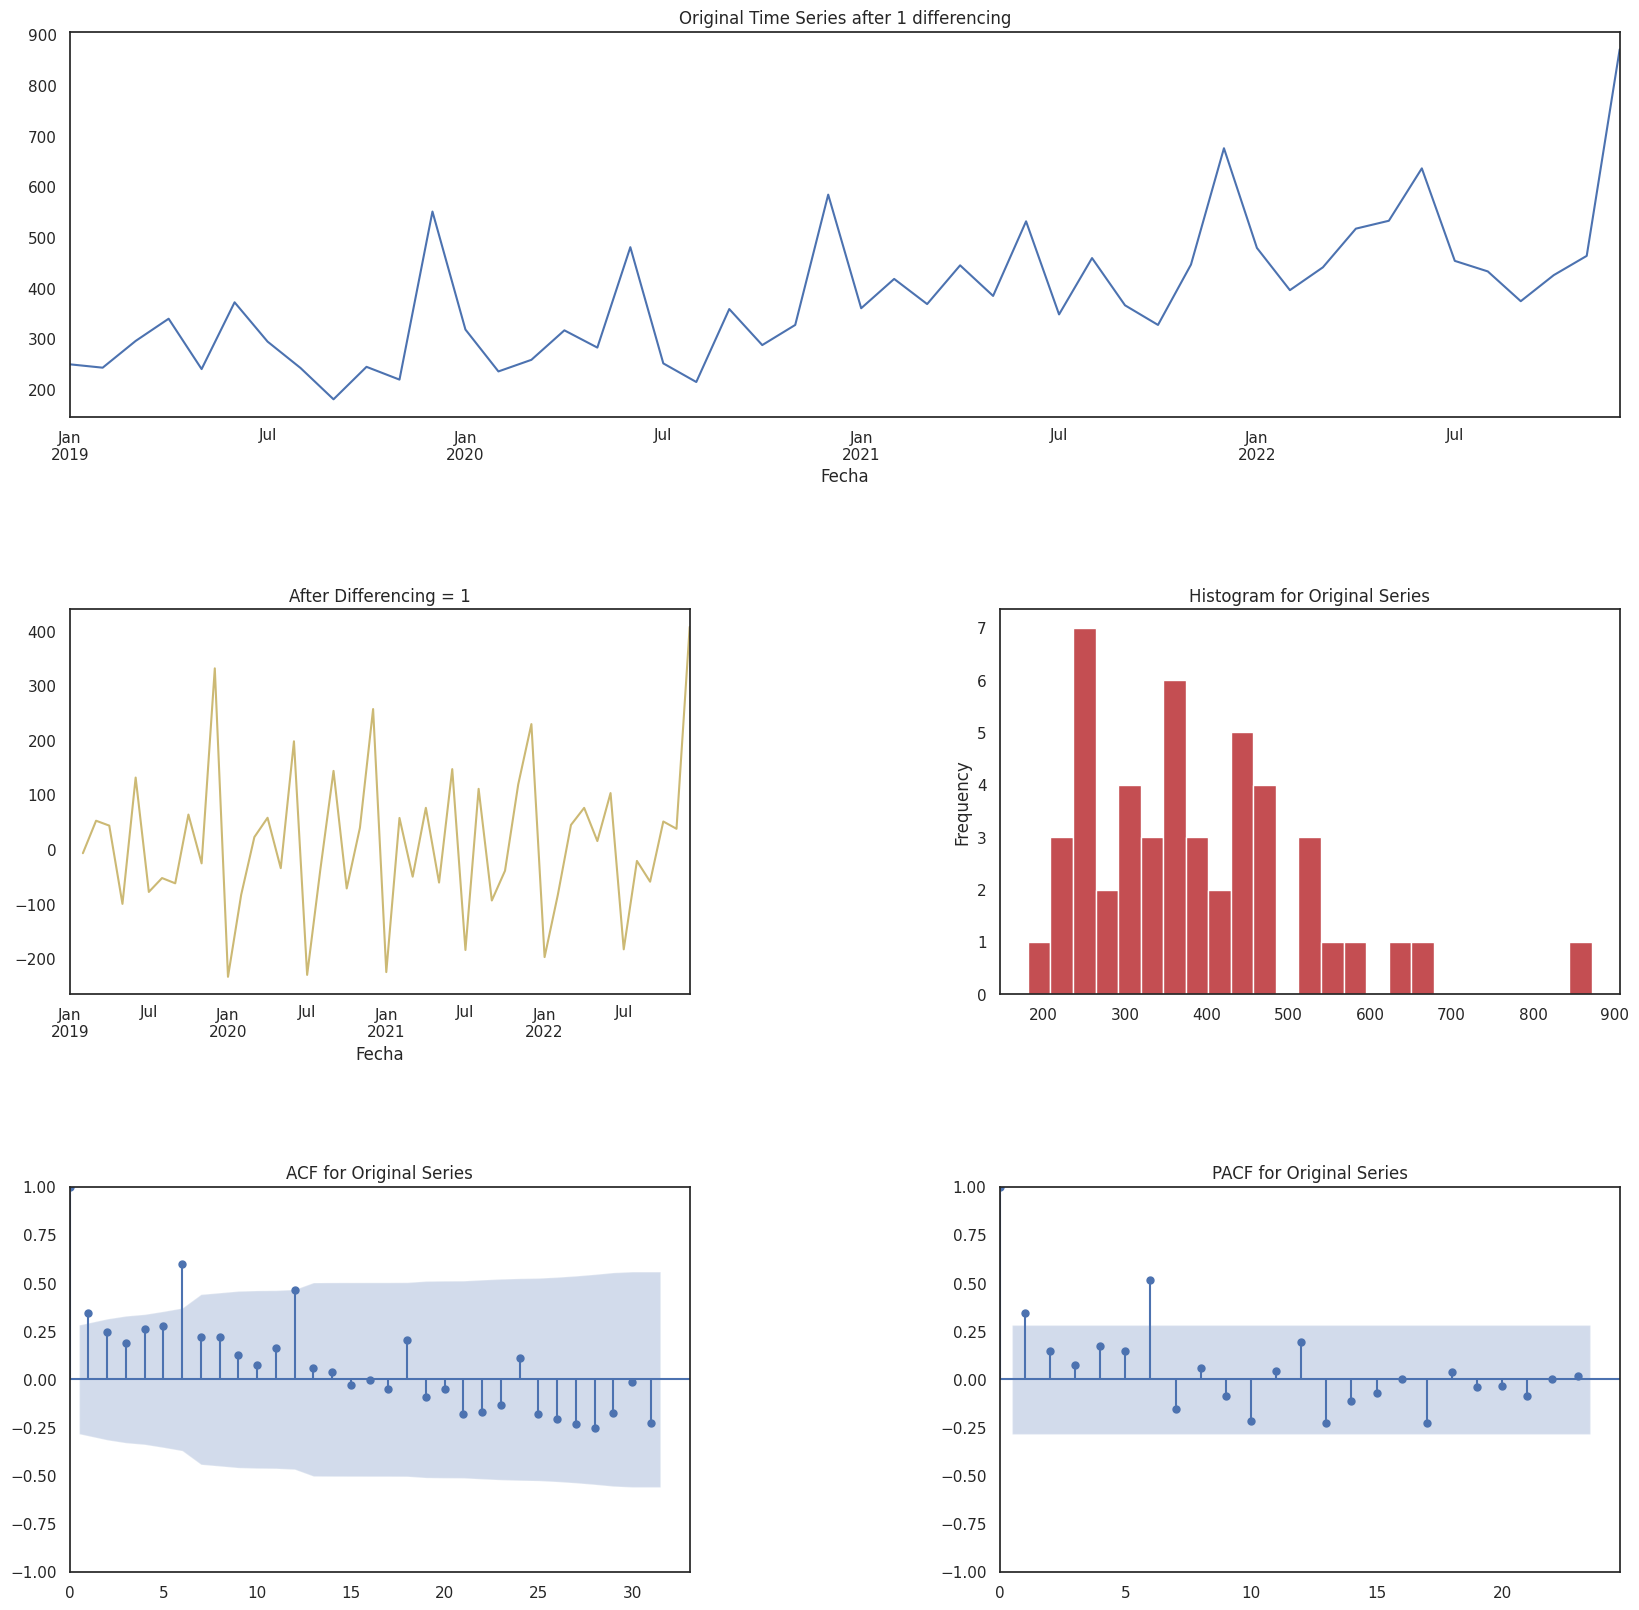

Time Interval is given as M
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...


DEBUG:cmdstanpy:input tempfile: /tmp/tmpepal_7m9/da53ecim.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpepal_7m9/4ukjb7fc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49588', 'data', 'file=/tmp/tmpepal_7m9/da53ecim.json', 'init=/tmp/tmpepal_7m9/4ukjb7fc.json', 'output', 'file=/tmp/tmpepal_7m9/prophet_modelx5lmi6xt/prophet_model-20241022044034.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
04:40:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


kwargs for Prophet model: {'random_state': 42}
    Fit-Predict data (shape=(48, 2)) with Confidence Interval = 0.95...
  Starting Prophet Fit
       Adding monthly seasonality to Prophet with period=12, fourier_order=12 and prior_scale=0.10
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 5

Fold Number: 1 --> Train Shape: 23 Test Shape: 5


04:40:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpepal_7m9/jhf0wt9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpepal_7m9/tma3d32l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27203', 'data', 'file=/tmp/tmpepal_7m9/jhf0wt9s.json', 'init=/tmp/tmpepal_7m9/tma3d32l.json', 'output', 'file=/tmp/tmpepal_7m9/prophet_modelb0ma8wsj/prophet_model-20241022044035.csv', 'method=optimize', 'algorithm=newton', 'iter=100']
04:40:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


    RMSE = 137.20
    Std Deviation of actuals = 80.91
    Normalized RMSE (as pct of std dev) = 170%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 28 Test Shape: 5


04:40:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Exception occurred while building Prophet model...
'DataFrame' object has no attribute 'append'
    FB Prophet may not be installed or Model is not running...


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: True
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 23 Test Shape: 5

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=128.459, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=132.446, Time=0.53 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.80 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=129.261, Time=0.06 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=inf, Time=0.91 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=130.445, Time=0.72 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=130.444, Time=0.27 sec
 ARIMA(0,0

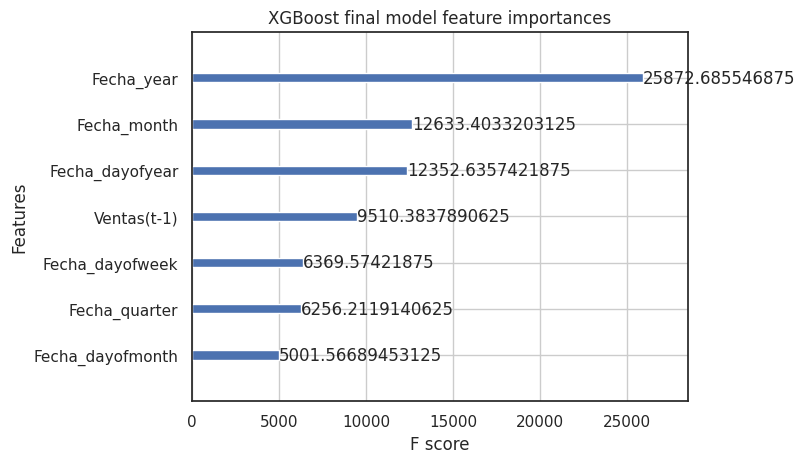

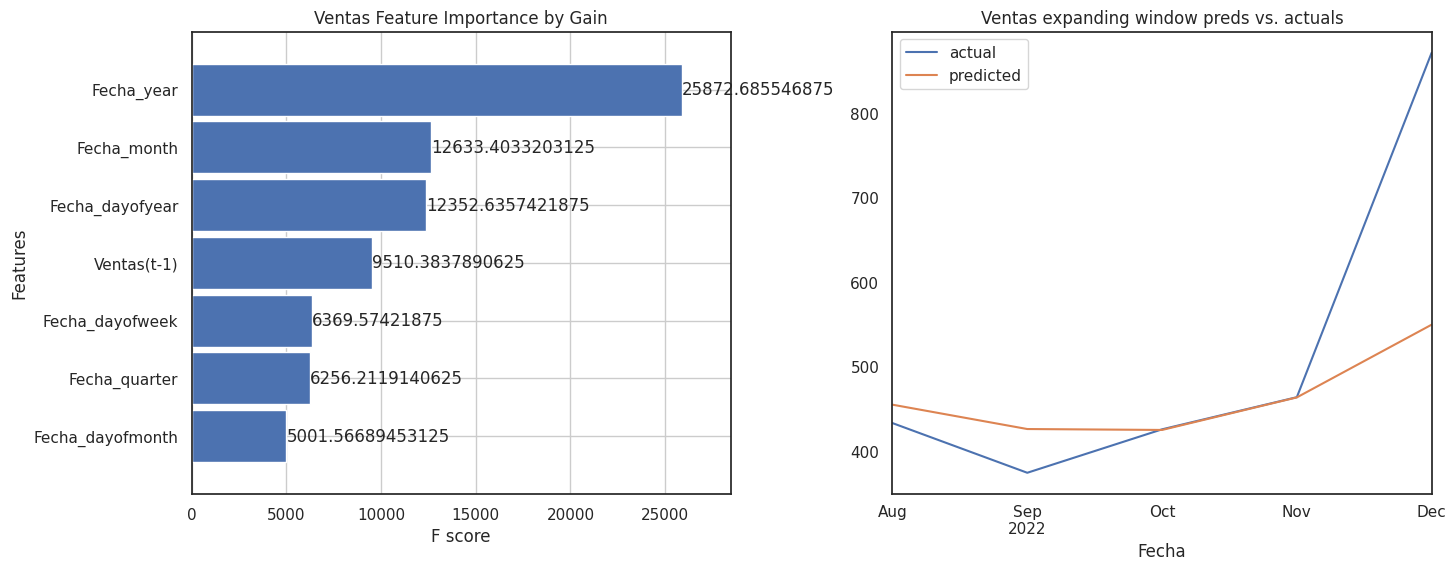

In [7]:
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

model.fit(
    traindata=train_df,
    ts_column=train_df.index.name,
    target='Ventas'
)

###**Prophet**

In [8]:
df = df.reset_index()  # Resetear el índice para convertirlo en columna
df.rename(columns={'index': 'ds'}, inplace=True)

df['ds'] = pd.to_datetime(df['Fecha'])  # Asegurarse de que la columna de fechas se llame 'ds'
df.rename(columns={'Ventas': 'y'}, inplace=True)  # Renombrar columna objetivo a 'y' como en Prophet

# Dividir los datos en entrenamiento (train_df) y prueba (test_df)
train_size = int(0.8 * len(df))
train_df_prophet = df[:train_size]
test_df_prophet = df[train_size:]

# Crear el modelo Prophet con estacionalidad habilitada
model_prophet = Prophet(seasonality_mode='additive')  # Se asume que la estacionalidad es relevante

# Ajustar el modelo con los datos de entrenamiento
train_df_prophet = df.drop(train_df_prophet.columns[0], axis=1)
model_prophet.fit(train_df_prophet[['ds', 'y']])

# Crear el dataframe de predicciones para el futuro
future = model_prophet.make_future_dataframe(periods=len(test_df_prophet), freq='M')  # Predicción mensual

# Realizar las predicciones
forecast_prophet = model_prophet.predict(future)

# Extraer las predicciones para las fechas de prueba
forecast_test = forecast_prophet[-len(test_df_prophet):]

# Comparar predicciones con los valores reales
comparison_prophet = pd.DataFrame({
    'real': test_df_prophet['y'].values,
    'predicted': forecast_test['yhat'].values
})

# Calcular las métricas de evaluación (RMSE y MAE)
mae_prophet = mean_absolute_error(test_df_prophet['y'], forecast_test['yhat'])
rmse_prophet = np.sqrt(mean_squared_error(test_df_prophet['y'], forecast_test['yhat']))

print(comparison_prophet)
print(f'MAE: {mae_prophet}, RMSE: {rmse_prophet}')

DEBUG:cmdstanpy:input tempfile: /tmp/tmpepal_7m9/2vho6pju.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpepal_7m9/3rt_0yta.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70676', 'data', 'file=/tmp/tmpepal_7m9/2vho6pju.json', 'init=/tmp/tmpepal_7m9/3rt_0yta.json', 'output', 'file=/tmp/tmpepal_7m9/prophet_modeln37lwdq7/prophet_model-20241022044105.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:41:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:41:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


      real   predicted
0   567.60  641.581304
1   487.35  632.831507
2   605.19  617.701032
3   569.81  698.991301
4   543.70  664.110844
5   739.91  829.386386
6   592.65  590.674984
7   576.14  610.664640
8   487.70  675.749145
9   527.68  606.448407
10  584.78  687.122560
11  948.78  939.366633
MAE: 82.17629235315026, RMSE: 99.71318730674943


###**ARIMA**

In [9]:
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.set_index('Fecha', inplace=True)  # Usar la columna de fechas como índice
df.rename(columns={'Ventas': 'y'}, inplace=True)  # Renombrar la columna objetivo a 'y'

# Dividir los datos en entrenamiento (train_df) y prueba (test_df)
train_size = int(0.8 * len(df))
train_df_arima = df[:train_size]
test_df = df[train_size:]

# Crear y ajustar el modelo ARIMA automáticamente
model_arima = auto_arima(train_df_arima['y'], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

# Realizar predicciones sobre el periodo de prueba
forecast = model_arima.predict(n_periods=len(test_df))

# Comparar predicciones con los valores reales
comparison_arima = pd.DataFrame({
    'real': test_df['y'].values,
    'predicted': forecast
})

# Calcular las métricas de evaluación (RMSE y MAE)
mae_arima = mean_absolute_error(test_df['y'], forecast)
rmse_arima = np.sqrt(mean_squared_error(test_df['y'], forecast))

# Mostrar resultados
print(comparison_arima)
print(f'MAE: {mae_arima}, RMSE: {rmse_arima}')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=3.52 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=412.073, Time=0.06 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=405.645, Time=1.19 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.50 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=435.470, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=414.049, Time=0.15 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=403.091, Time=3.27 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.24 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=401.113, Time=0.59 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=403.695, Time=0.21 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=0.84 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=403.082, Time=0.85 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : AIC=405.074, Time=

Comparación de RMSE por tipo de modelo (ML, Prophet y ARIMA)

In [10]:
#ML
leaderboard = model.get_leaderboard()
rmse_ml = leaderboard[leaderboard['name'] == 'ML']['rmse'].values[0]

#Prophet
rmse_prophet = rmse_prophet

#ARIMA
rmse_arima = rmse_arima

def encontrar_mejor(a, b, c):
    # Crear un diccionario para mapear nombres a valores
    variables = {
        'ML': a,
        'Prophet': b,
        'ARIMA': c
    }

    # Encontrar la variable con el mayor valor
    mejor_variable = min(variables, key=variables.get)
    return mejor_variable

nombre_menor = encontrar_mejor(rmse_ml, rmse_prophet, rmse_arima)
print(f"El mejor modelo es: {nombre_menor}")

El mejor modelo es: ARIMA


## Paso 4: Evaluación del Modelo
Predicción y Comparación con Datos Reales

In [11]:
forecast = model.predict(testdata=test_df)
forecast.head()

Predicting using test dataframe shape = (12, 2) for ML model
For large datasets: ML predictions will take time since it has to predict each row and use that for future predictions...
    Using given input: pandas dataframe...
    Alert: No strf_time_format given for Fecha. Provide strf_time format during "setup" for better results.
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date time derived features. Continuing...
    Error in creating date

,yhat,mean_se,mean_ci_lower,mean_ci_upper
Fecha,,,,
2023-01-31,439.410675,NaN,NaN,NaN
2023-02-28,386.693573,NaN,NaN,NaN
2023-03-31,385.583954,NaN,NaN,NaN
2023-04-30,431.850586,NaN,NaN,NaN
2023-05-31,422.195435,NaN,NaN,NaN


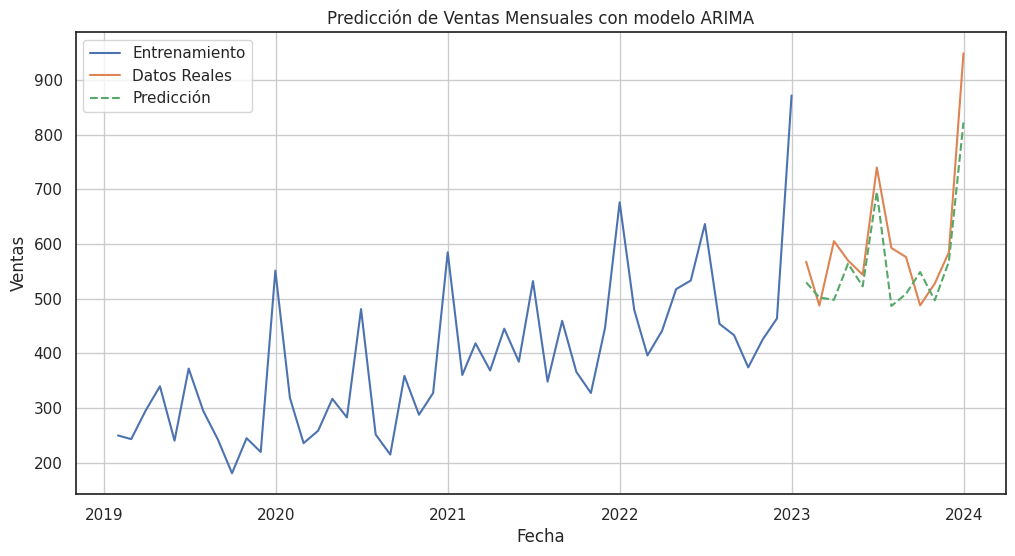

In [12]:
if nombre_menor == 'ML':
    plt.figure(figsize=(12,6))
    plt.plot(train_df.index, train_df['Ventas'], label='Entrenamiento')
    plt.plot(test_df.index, test_df['y'], label='Datos Reales')
    plt.plot(test_df.index, forecast['yhat'], label='Predicción', linestyle='--')
    plt.title('Predicción de Ventas Mensuales con modelo ML')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'Prophet':
    plt.figure(figsize=(12,6))
    plt.plot(train_df.index, train_df['Ventas'], label='Entrenamiento')
    plt.plot(test_df.index, comparison_prophet["real"], label='Datos Reales')
    plt.plot(test_df.index, comparison_prophet["predicted"], label='Predicción', linestyle='--')
    plt.title('Predicción de Ventas Mensuales con modelo Prophet')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'ARIMA':
    plt.figure(figsize=(12,6))
    plt.plot(train_df.index, train_df['Ventas'], label='Entrenamiento')
    plt.plot(test_df.index, comparison_arima["real"], label='Datos Reales')
    plt.plot(test_df.index, comparison_arima["predicted"], label='Predicción', linestyle='--')
    plt.title('Predicción de Ventas Mensuales con modelo ARIMA')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
if nombre_menor == 'ML':
    rmse = mean_squared_error(test_df['y'], forecast['yhat'], squared=False)
    print(f'RMSE en el conjunto de prueba: {rmse:.2f}')
elif nombre_menor == 'Prophet':
    rmse = mean_squared_error(comparison_prophet["real"], comparison_prophet["predicted"], squared=False)
    print(f'RMSE en el conjunto de prueba: {rmse:.2f}')
elif nombre_menor == 'ARIMA':
    rmse = mean_squared_error(comparison_arima["real"], comparison_arima["predicted"], squared=False)
    print(f'RMSE en el conjunto de prueba: {rmse:.2f}')

RMSE en el conjunto de prueba: 66.04


## Paso 5: Predicción Futura
Ahora que tenemos un modelo validado, procedemos a predecir las ventas para el próximo año.

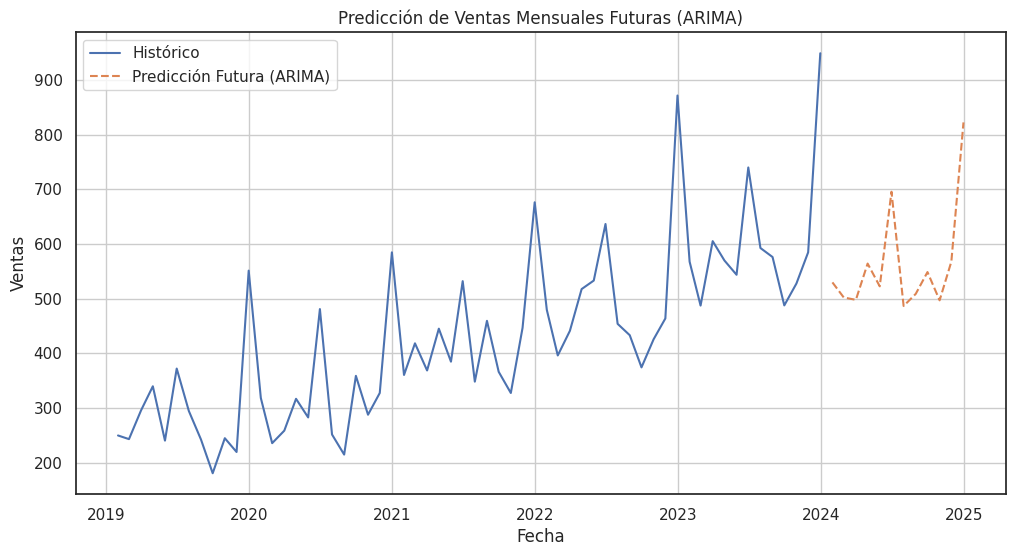

In [14]:
if nombre_menor == 'ML':
    # Modelo ML - Predicción Futura
    future_periods = 12
    last_date = df.index[-1]
    future_dates = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')

    future_df = pd.DataFrame(index=future_dates)
    future_forecast = model.predict(testdata=future_df)

    plt.figure(figsize=(12,6))
    plt.plot(df.index, df['y'], label='Histórico')
    plt.plot(future_dates, future_forecast['yhat'], label='Predicción Futura (ML)', linestyle='--')
    plt.title('Predicción de Ventas Mensuales Futuras (ML)')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'Prophet':
    # Modelo Prophet - Predicción Futura
    # Definir el número de períodos futuros
    future_periods = 12

    # Crear un DataFrame vacío con las fechas futuras
    last_date = df.index[-1]
    future_dates_prophet = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')
    future_df_prophet = pd.DataFrame(index=future_dates_prophet)

    # Predecir con el modelo Prophet utilizando predict()
    future = model_prophet.make_future_dataframe(periods=future_periods, freq='M')
    future_forecast_prophet = model_prophet.predict(future)

    # Visualización de las predicciones futuras con Prophet
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['y'], label='Histórico')
    plt.plot(future_df_prophet.index, future_forecast_prophet['yhat'].tail(12), label='Predicción Futura (Prophet)', linestyle='--')
    plt.title('Predicción de Ventas Mensuales Futuras (Prophet)')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()
elif nombre_menor == 'ARIMA':
    # Modelo ARIMA - Predicción Futura
    # Definir el número de períodos futuros
    future_periods = 12

    # Crear un DataFrame vacío con las fechas futuras
    last_date = df.index[-1]
    future_dates_arima = pd.date_range(start=last_date + pd.DateOffset(months=1), periods=future_periods, freq='M')
    future_df_arima = pd.DataFrame(index=future_dates_arima)

    # Predecir con el modelo ARIMA utilizando predict()
    future_forecast_arima = model_arima.predict(n_periods=future_periods)

    # Visualización de las predicciones futuras con ARIMA
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['y'], label='Histórico')
    plt.plot(future_df_arima.index, future_forecast_arima, label='Predicción Futura (ARIMA)', linestyle='--')
    plt.title('Predicción de Ventas Mensuales Futuras (ARIMA)')
    plt.xlabel('Fecha')
    plt.ylabel('Ventas')
    plt.legend()
    plt.grid(True)
    plt.show()

# Explicación del Proceso Interno del Modelo con `auto_timeseries`

En este fragmento de código, inicializamos el modelo `auto_timeseries`, que automatiza el proceso de selección y ajuste de modelos de series temporales. A continuación, detallamos lo que sucede "bajo el capó" y las consideraciones para un entorno profesional.

---

## 1. `score_type='rmse'`

### Lo que ocurre:
- **RMSE (Root Mean Squared Error)** se utiliza como la métrica de evaluación del modelo. RMSE mide el error promedio de las predicciones del modelo en las mismas unidades que la variable de interés (en este caso, ventas).
  
### En el entorno profesional:
- **Iterar sobre la métrica de evaluación**: Dependiendo del objetivo del negocio, podrías cambiar la métrica de evaluación. Si, por ejemplo, te interesa penalizar los errores más grandes o deseas que las predicciones sean más robustas ante los outliers, podrías usar **MAE (Mean Absolute Error)** en lugar de RMSE.
- **Otras métricas**: En problemas de ventas o finanzas, también puedes considerar métricas como MAPE (Mean Absolute Percentage Error), que es útil cuando quieres evaluar el error en términos porcentuales.

---

## 2. `time_interval='M'`

### Lo que ocurre:
- **'M' (Mensual)** indica que los datos están a nivel mensual. Esto le dice a `auto_timeseries` que la frecuencia de los datos es mensual y ajustará modelos que se alineen con este intervalo de tiempo.

### En el entorno profesional:
- **Validar la granularidad correcta**: La elección del intervalo debe basarse en la granularidad de los datos. Si trabajas con datos diarios o trimestrales, cambiar este parámetro a `'D'` o `'Q'` sería necesario.
- **Iterar entre diferentes intervalos**: A veces, los datos deben agregarse o desagregarse. Por ejemplo, si tienes datos diarios, podrías intentar predicciones con agregaciones semanales o mensuales para obtener una mejor visión del comportamiento a largo plazo.

---

## 3. `non_seasonal_pdq=None`

### Lo que ocurre:
- **Non-seasonal pdq** se refiere a los parámetros p, d y q para el modelo ARIMA, que son responsables de capturar la dinámica temporal. Si no lo defines, `auto_timeseries` probará diferentes combinaciones de estos valores automáticamente.

### En el entorno profesional:
- **Ajuste manual de parámetros**: Aunque `auto_timeseries` optimiza estos parámetros, en un entorno profesional podría ser necesario afinar estos valores manualmente en función del conocimiento del dominio. Por ejemplo, si sabes que tu serie temporal tiene una dependencia de retrasos específicos (como 12 meses en el pasado), puedes ajustar p o q en consecuencia.
- **Control de la complejidad del modelo**: Un exceso en los valores p y q puede sobreajustar los datos. Iterar sobre diferentes configuraciones puede evitar que el modelo sea demasiado complejo o demasiado simple.

---

## 4. `seasonality=False`

### Lo que ocurre:
- **Seasonality=False** indica que no se está buscando estacionalidad en los datos. La estacionalidad es un patrón repetitivo que ocurre en intervalos regulares (como ventas que aumentan cada diciembre).
  
### En el entorno profesional:
- **Identificación de la estacionalidad**: Si tus datos tienen estacionalidad, como en el caso de ventas que aumentan durante ciertas temporadas, deberías habilitar este parámetro para buscar patrones estacionales. Esto puede involucrar ajustar el parámetro a `True` y probar si el modelo con estacionalidad mejora las predicciones.
- **Iterar sobre diferentes tipos de estacionalidad**: Dependiendo del dominio, es posible que tengas estacionalidad anual, mensual o incluso semanal. En ventas, por ejemplo, las estacionalidades anuales o trimestrales suelen ser comunes.

---

## 5. `model_type='best'`

### Lo que ocurre:
- **'best'** selecciona automáticamente el mejor modelo basado en los criterios de evaluación. `auto_timeseries` probará varios modelos de series temporales (como ARIMA, Prophet, y Holt-Winters) y seleccionará el que minimice el error (en este caso, RMSE).

### En el entorno profesional:
- **Iteración manual del tipo de modelo**: Aunque `auto_timeseries` elige el mejor modelo, en un entorno profesional podrías querer probar diferentes modelos de manera manual. Por ejemplo, si ya tienes una intuición de que un modelo SARIMA o Prophet funcionará mejor en tu caso, puedes especificar esos modelos y ajustar los parámetros manualmente.
- **Consideraciones de rendimiento**: Al elegir "best", el proceso podría ser costoso en términos computacionales, ya que `auto_timeseries` probará muchos modelos. En ambientes de producción, podrías restringir este tipo de búsqueda a modelos específicos para reducir el tiempo de procesamiento.

---

## 6. `verbose=2`

### Lo que ocurre:
- **verbose=2** indica el nivel de detalle de la información que se mostrará durante el ajuste del modelo. En este nivel, verás información detallada del proceso, como los modelos que se están probando y sus resultados intermedios.

### En el entorno profesional:
- **Control del nivel de información**: En un entorno de desarrollo, este nivel de verbosidad es útil para entender qué está sucediendo. Sin embargo, en un entorno de producción, podrías bajar el nivel de verbosidad para evitar el exceso de logs y hacer más eficiente el monitoreo del proceso.
- **Iterar entre niveles de verbosidad**: En el desarrollo de modelos, iterar entre niveles de verbosidad puede ayudarte a comprender mejor qué está haciendo el modelo bajo ciertas configuraciones.

---

## Resumen

Este bloque de código automatiza gran parte del proceso de modelado de series temporales utilizando `auto_timeseries`. En un entorno profesional, es crucial iterar sobre varios aspectos:
- **Métricas de evaluación** para alinearlas con los objetivos del negocio.
- **Intervalos de tiempo** para asegurar la granularidad adecuada de los datos.
- **Parámetros estacionales** y **ARIMA** para afinar el modelo en función del comportamiento observado.
- **Tipos de modelos** para mejorar el rendimiento en casos específicos.
- **Control de verbosidad** para adaptarse a diferentes etapas del ciclo de desarrollo y producción.

Estas iteraciones aseguran que el modelo final no solo sea preciso, sino también eficiente y adecuado para el contexto empresarial en el que se aplica.
